<a href="https://colab.research.google.com/github/Heather-bu/bme3053c/blob/main/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [2]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

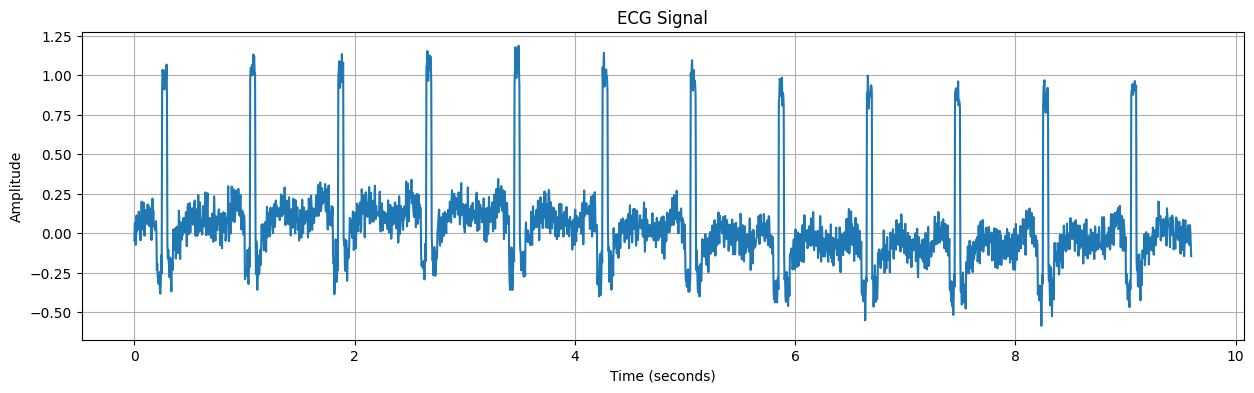

In [3]:
#vizualizing ecg signal
sampling_rate = 250  # Hz
time = np.arange(len(ecg_data)) / sampling_rate  # Time in seconds

plt.figure(figsize=(15, 4))
plt.plot(time, ecg_data)
plt.title('ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


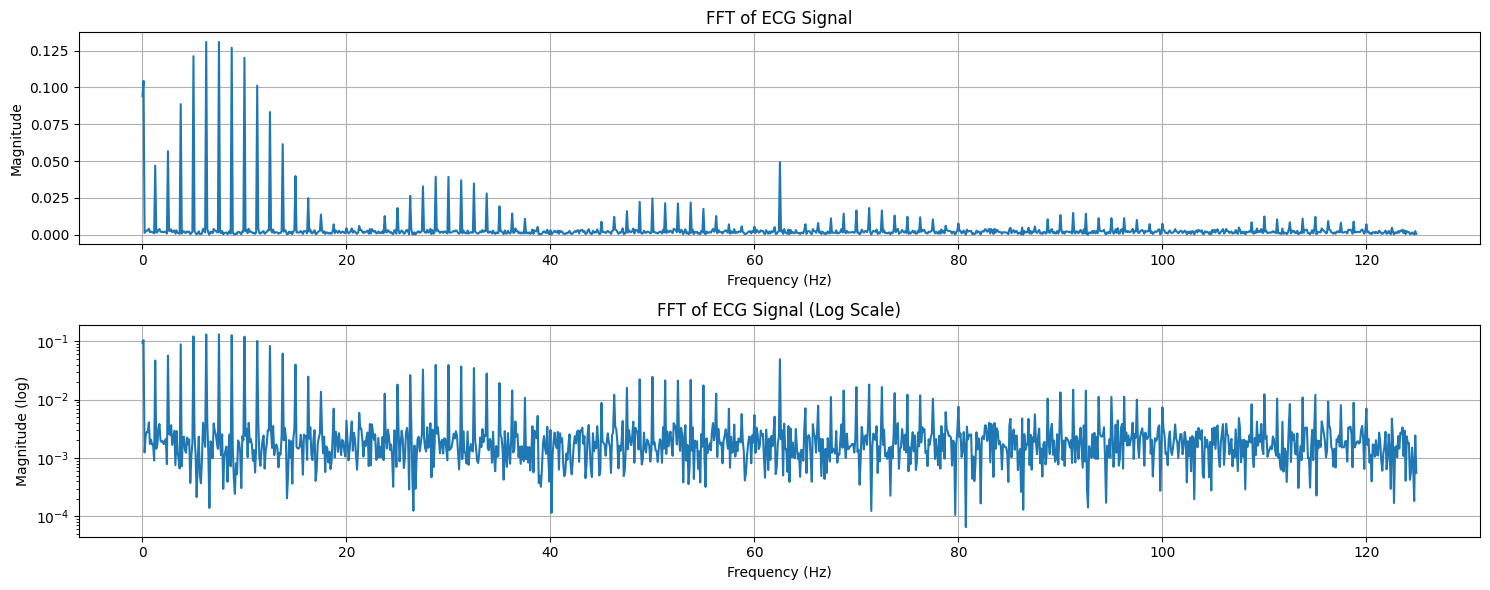

In [4]:
#Fourier Transform

# Compute the FFT
n = len(ecg_data)
fft_result = fft(ecg_data)
frequencies = np.fft.fftfreq(n, 1/sampling_rate)

# Compute magnitude spectrum (take absolute value and normalize)
magnitude_spectrum = 2.0/n * np.abs(fft_result)

# Plot only the positive frequencies (up to Nyquist frequency)
positive_freq_mask = frequencies >= 0
plt.figure(figsize=(15, 6))

# Plot in frequency domain
plt.subplot(2, 1, 1)
plt.plot(frequencies[positive_freq_mask], magnitude_spectrum[positive_freq_mask])
plt.title('FFT of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot in log scale to better see smaller components
plt.subplot(2, 1, 2)
plt.semilogy(frequencies[positive_freq_mask], magnitude_spectrum[positive_freq_mask])
plt.title('FFT of ECG Signal (Log Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (log)')
plt.grid(True)

plt.tight_layout()
plt.show()

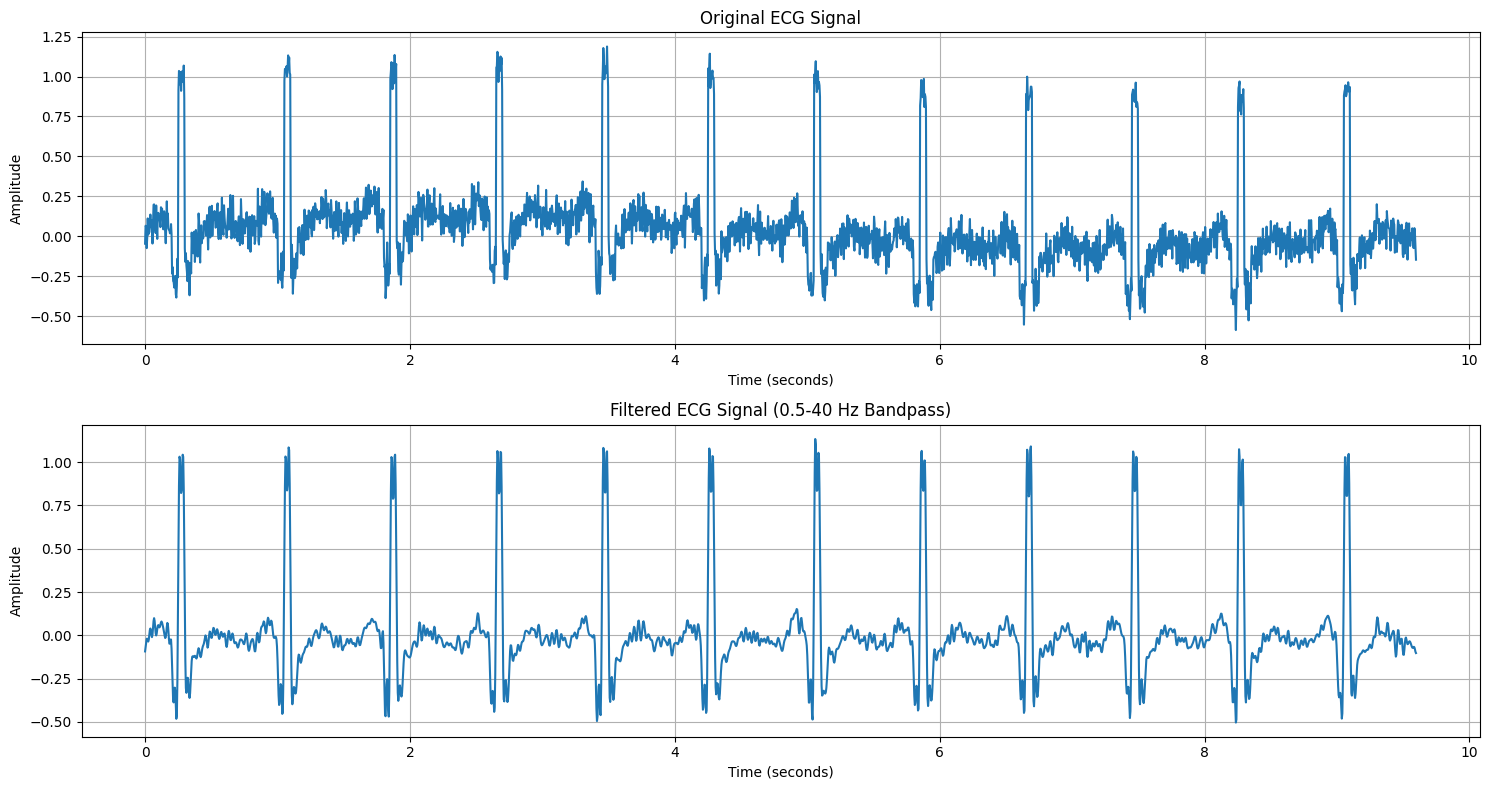

In [5]:
#Filtering the ECG Signal

# Create bandpass filter mask (0.5 Hz to 40 Hz)
bandpass_mask = (np.abs(frequencies) >= 0.5) & (np.abs(frequencies) <= 40)

# Apply filter by multiplying FFT with mask
filtered_fft = fft_result * bandpass_mask

# Reconstruct the signal using inverse FFT
filtered_ecg = ifft(filtered_fft).real

# Plot original vs filtered signals
plt.figure(figsize=(15, 8))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(time, ecg_data)
plt.title('Original ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_ecg)
plt.title('Filtered ECG Signal (0.5-40 Hz Bandpass)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
#Heart Rate Calculation
# Find R peaks in the filtered signal
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=50)  # Adjust height and distance as needed

# Calculate time intervals between peaks (in seconds)
peak_times = time[peaks]
intervals = np.diff(peak_times)

# Calculate average interval and convert to BPM
average_interval = np.mean(intervals)
heart_rate_bpm = 60 / average_interval

# Print results
print(f"Average Heart Rate: {heart_rate_bpm:.1f} BPM")



Average Heart Rate: 75.0 BPM


Summarize Your Findings:
